
# Regression Example
The example below uses a [marketing](https://scikit-learn.org/stable/datasets/toy_dataset.html) dataset,
in order to illustrate a regression activity.

## Workflow
1. Preparation
    1. Load the dataset from a `.csv` file and show a short description
    1. Data preparation, according to background information
    1. Set the __target__ variable, according to background information
    1. Show the two dimensional scatter plots for all the predicting variables with respect to the target
    1. Split the data into *predicting variables* `X` and *target* `y`
        1. here we set the `random_state` variable to make the experiment *repeatable*
1. First experiment: compute the regression on a single predicting variable
    1. Consider a reduced dataset containing the chosen variable and the target
    1. Fit the `LinearRegression` estimator on the training set
    1. Show the statistical significance of the fitted model
    1. Predict the target for the test set using the *fitted* estimator
    1. Compute the regression coefficients and the quality measures: *Root Mean Squared Error (RMSE)* and *coefficient of determination (r2)*
1. Second experiment: compute the regression considering all the predicting variables
    1. Repeat the steps from 2.2 to 2.5
1. Third experiment: use the `DecisionTreeRegressor` with the entire dataset
    1. Fit the tree using the default hyperparameters, in order to find the
    maximum depth of the unconstrained tree
    1. Use *cross-validation* to find the optimal *maximum depth* of the tree
    1. Fit the tree with the optmal `max_depth`
    1. Predict and show the *root mean squared error*
1. Fourth experiment: use the `RandomForestRegressor`
    1. Repeat steps from 4.2 to 4.4 (for simplicity, we use the maximum `max_depth` found in 4.1)


In [34]:
# Code source: Claudio Sartori
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
#from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
random_state = 94922767 # this will be used to guarantee the repeatability of the experiment

url = '/content/regression_example.csv'
train_size = 0.7

## Load the dataset from a `.csv` file and show a short description

In [35]:
df = pd.read_csv(url, index_col=0)
df.shape

(843, 9)

## Data Exploration and preparation

##### Show a short description of the columns

In [36]:
df.describe()

,F0,F1,F2,F3,F4,F5,F6,F7,response
count,802.000000,807.000000,812.000000,8.020000e+02,805.000000,808.000000,806.000000,812.000000,813.000000
mean,-0.037473,0.008466,-0.059965,9.616777e-01,-0.093113,0.034653,-0.019928,-0.034976,3.798356
std,1.038115,0.973884,0.991280,1.286476e+00,1.050385,0.957238,0.997345,0.963010,114.189124
min,-3.700229,-2.832440,-4.141473,2.007427e-08,-4.072767,-2.968219,-2.850505,-3.948627,-358.659591
25%,-0.723630,-0.640017,-0.681924,8.725649e-02,-0.802553,-0.625219,-0.689671,-0.662887,-73.823652
50%,-0.032953,0.005693,-0.050789,4.707895e-01,-0.090512,0.051123,-0.014592,-0.049392,-0.159154
75%,0.629368,0.681480,0.587393,1.350123e+00,0.611545,0.689203,0.612939,0.614423,75.487094
max,3.043062,2.945731,2.925432,9.200073e+00,3.024952,3.210373,2.861549,3.000174,422.794685


##### Show the number of rows with nulls

It is computed subtracting the number of rows in the dataset without nulls from the original number of rows

In [37]:
print('The number of rows with nulls is {:4}'.format(df.shape[0] - df.dropna().copy().shape[0]))

The number of rows with nulls is  273


#### Drop data that are useless or not usable

In [38]:
df = df.dropna()
print('New shape is {}'.format(df.shape))

New shape is (570, 9)


In [39]:
df.head()

,F0,F1,F2,F3,F4,F5,F6,F7,response
idx,,,,,,,,,
1,0.644764,0.007172,0.004493,4.168748,-0.622817,1.855366,-0.540468,1.141118,151.951717
2,0.890241,1.080162,0.168031,0.002733,0.522478,0.407804,1.629592,-1.102599,117.280863
3,-0.212410,-1.034267,1.843441,4.486992,-0.610050,0.734101,-0.142660,-0.172119,229.358473
4,-0.827402,-2.048496,-0.066242,1.361695,1.268456,-1.084906,1.986556,0.425511,230.153189
5,-0.635465,-1.112850,-0.330580,6.141348,1.914527,0.408895,-0.364722,-0.731382,-261.116572


## Choose the target and split the data into *predicting variables* `X` and *target* `y`

In [40]:
target = 'response'
X = df.drop(target, axis=1).copy()
y = df[target]
X.shape

(570, 8)

## Show the two dimensional scatter plots for all the predicting variables with respect to the target

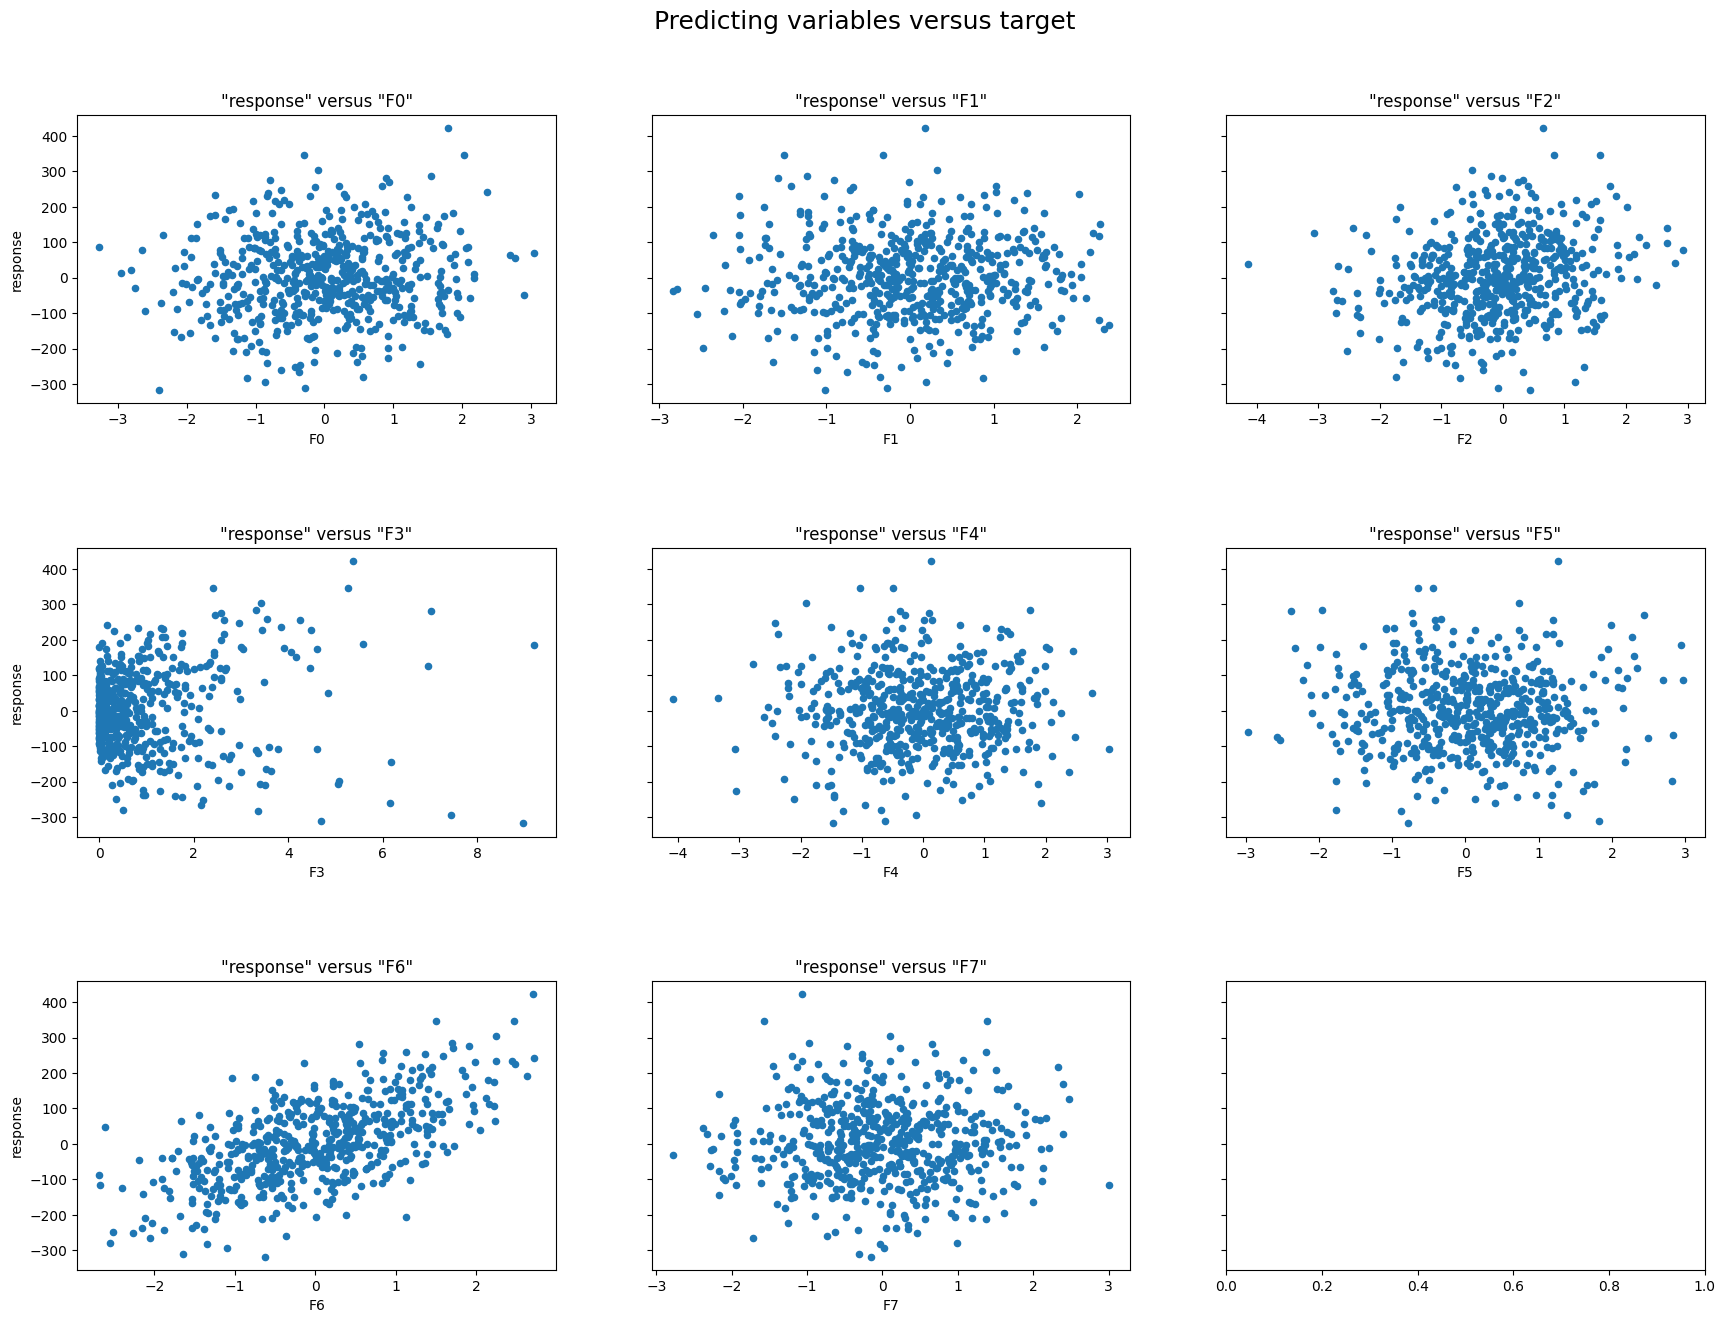

In [41]:
ncols=3
import math
nrows = math.ceil((df.shape[1]-1)/ncols)
figwidth = ncols * 7
figheigth = nrows*5

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(figwidth, figheigth),sharey=True)
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Predicting variables versus target", fontsize=18, y=0.95)

for c, ax in zip(df.drop(target,axis=1).columns,axs.ravel()):
    df.sort_values(by=c).plot.scatter(x=c,y=target
                                    , title = '"{}" versus "{}"'.format(target,c)
                                    , ax=ax)

<Axes: >

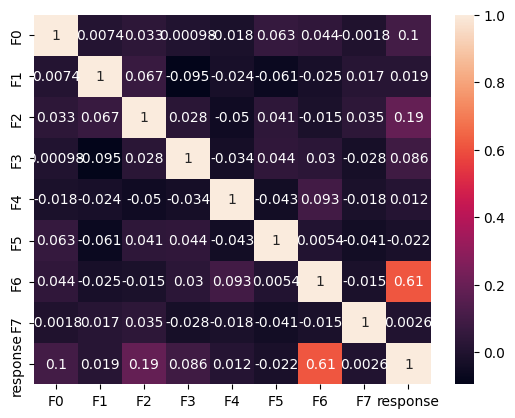

In [42]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

## Split the data into *train* and *test* and show the sizes of the two parts
Here we set the `random_state` variable to make the experiment *repeatable*


In [43]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=random_state, train_size=train_size)
print('The training and testing set have respectively {} and {} elements'.format(Xtrain.shape[0], Xtest.shape[0]))

The training and testing set have respectively 399 and 171 elements


## 2. First experiment - univariate linear regression
We choose the variable exhibiting the highest correlation with respect to the target

Consider a reduced dataset containing the chosen variable and the target

In [44]:
Xtrain_uni = Xtrain['F6'].values.reshape(-1, 1)
Xtest_uni = Xtest['F6'].values.reshape(-1, 1)
Xtrain_uni.shape

(399, 1)

### Fit the `linear_model` estimator on the training set and predict the target for the test set using the *fitted* estimator

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
lr = LinearRegression()
lr.fit(Xtrain_uni, ytrain)

ytrain_lr = lr.predict(Xtrain_uni)
ytest_lr = lr.predict(Xtest_uni)

r2 = r2_score(ytest, ytest_lr)
rmse = mean_squared_error(ytest, ytest_lr, squared=False)

results = pd.DataFrame()
results = pd.DataFrame(columns=['Model','RMSE','R_square'])
results.loc[len(results)] = ['Univariate Linear Regression', rmse, r2]

#### Compute the quality measures

In [46]:
results

,Model,RMSE,R_square
0,Univariate Linear Regression,85.121744,0.338477


## Second experiment: compute the regression considering all the predicting variables

### Now we use the entire data in `X_train` and `X_test` for fitting and predicting

In [47]:
lr = LinearRegression()
lr.fit(Xtrain, ytrain)
y_lr = lr.predict(Xtest)

r2 = r2_score(ytest, y_lr)
rmse = mean_squared_error(ytest, y_lr, squared=False)
results.loc[len(results)] = ['Linear Regression', rmse, r2]

### Fit, predict and show the results
Now we see the *regression coefficients* resulting from the fitting.

In particular, *positive coefficients* indicate that the target *increases* with the variable, *negative coefficients* indicate a *decreasing* trend.

The absolute values of the coefficient cannot be considered directly a measure of importance, due to the possibly different orders of magnitude of the data in the different columns (observe above the outputs of `describe`).

In [48]:
lr.coef_

array([ 9.22532932,  2.79484589, 21.76617086,  3.29959357, -5.53238646,
       -6.00288389, 72.94962525, -2.67582365])

#### Compute the quality measures

In [49]:
results

,Model,RMSE,R_square
0,Univariate Linear Regression,85.121744,0.338477
1,Linear Regression,81.104168,0.399448


## Decision Tree Multivariate Regresson

In [50]:
# Create Decision Tree regression object
from sklearn.tree import DecisionTreeRegressor

#### Fit the tree with default hyperparameters, and find the maximum depth of the unconstrained tree

In [51]:
dt = DecisionTreeRegressor()
dt.fit(Xtrain, ytrain)
prev_max_depth = dt.tree_.max_depth
print('The maximum depth of the full Decision Tree Regressor is {}'.format(prev_max_depth))

The maximum depth of the full Decision Tree Regressor is 22


#### Find the optimal value of the hyperparameter `max_depth` with *cross-validation*
The optimization searches for the *maximum tree depth* guaranteing the smallest mean squared error
At the end, this operation returns also the *fitted best tree* `best_estimator_`

In [52]:
from sklearn.model_selection import GridSearchCV

dt_params = [{'max_depth' : list(np.arange(1, prev_max_depth+1))}]
gs = GridSearchCV(DecisionTreeRegressor(), dt_params, refit=True)
gs.fit(Xtrain, ytrain)
y_dt = gs.predict(Xtest)

rmse = mean_squared_error(ytest, y_dt, squared=False)
results.loc[len(results)] = ['Decision Tree Regressor' , rmse, np.nan]

In [53]:
dt_best_max_depth = gs.best_estimator_.tree_.max_depth
print('The optimal depth for the Decision Tree Regressor is {}\n'.format(dt_best_max_depth))
results

The optimal depth for the Decision Tree Regressor is 2



,Model,RMSE,R_square
0,Univariate Linear Regression,85.121744,0.338477
1,Linear Regression,81.104168,0.399448
2,Decision Tree Regressor,89.827208,NaN


#### Show the tree

[Text(0.5, 0.8333333333333334, 'x[6] <= 0.493\nsquared_error = 13809.026\nsamples = 399\nvalue = 0.479'),
 Text(0.25, 0.5, 'x[6] <= -1.071\nsquared_error = 9807.563\nsamples = 282\nvalue = -38.248'),
 Text(0.125, 0.16666666666666666, 'squared_error = 8030.323\nsamples = 57\nvalue = -115.58'),
 Text(0.375, 0.16666666666666666, 'squared_error = 8359.033\nsamples = 225\nvalue = -18.658'),
 Text(0.75, 0.5, 'x[6] <= 1.68\nsquared_error = 11125.64\nsamples = 117\nvalue = 93.823'),
 Text(0.625, 0.16666666666666666, 'squared_error = 8971.137\nsamples = 102\nvalue = 76.235'),
 Text(0.875, 0.16666666666666666, 'squared_error = 9369.573\nsamples = 15\nvalue = 213.419')]

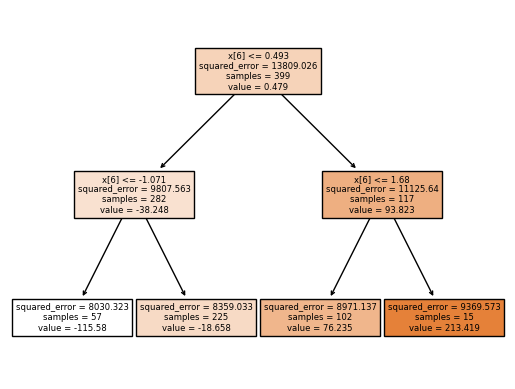

In [54]:
from sklearn.tree import plot_tree
from matplotlib.pyplot import figure

plot_tree(gs.best_estimator_, filled=True)

## Random Forest Multivariate Regresson

In [55]:
# Create Random Forest regression object
from sklearn.ensemble import RandomForestRegressor

param_grid = [{'random_state' : [random_state], 'max_depth' : list(np.arange(1, dt_best_max_depth))}]

gs = GridSearchCV(RandomForestRegressor(), param_grid, refit=True)
gs.fit(Xtrain, ytrain)
y_gs = gs.predict(Xtest)

In [56]:
rf_best_max_depth = gs.best_estimator_.max_depth
print('The optimal maximum depth for the trees in the random forest is {}'.format(rf_best_max_depth))

The optimal maximum depth for the trees in the random forest is 1


In [57]:
rmse = mean_squared_error(ytest, y_gs, squared=False)
print('Random Forest Regression - RMSE = {:.2f}'.format(rmse))
results.loc[len(results)] = ['Random Forest Regressor', rmse, np.nan]

Random Forest Regression - RMSE = 93.74


In [58]:
results.sort_values('RMSE', ascending=False)

,Model,RMSE,R_square
3,Random Forest Regressor,93.739191,NaN
2,Decision Tree Regressor,89.827208,NaN
0,Univariate Linear Regression,85.121744,0.338477
1,Linear Regression,81.104168,0.399448


## Final observations
### Linear regression
The multivariate regression with all the predicting variables available with respect to the univariate regression has
- lower RMSE
- higher coefficient of determination

### Decision Tree and Random Forest regression
- Decision Tree and Random Forest have an RMSE slightly higher than multivariate linear regression



## Control questions
1. observing the multi-variate experiment, what variable has the higher effect on the target?
1. is there a variable having an almost negligible effect on the target?
1. try to repeat the univariate experiment with other columns and comment the results